In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import csv

/home/claudio/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
num_clusters = 4
num_steps = 100
num_vectors = 1000

lat_values = []
lon_values = []
vector_values = []

In [3]:
def display_partition(x_values,y_values,assignment_values):
    labels = []
    colors = ["red","blue","green","yellow"]
    for i in range(len(assignment_values)):
        labels.append(colors[(assignment_values[i])])
    color = labels
    df = pd.DataFrame(dict(x =x_values,y = y_values ,color = labels ))
    fig, ax = plt.subplots()
    ax.scatter(df['x'], df['y'], c=df['color'])
    plt.show()

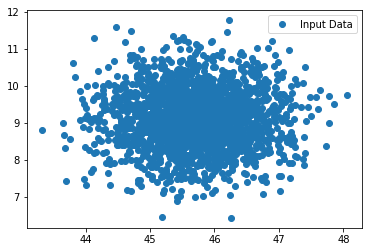

In [8]:
for i in range(num_vectors):
    radlat = np.random.normal(45.7, 0.7)
    radlon = np.random.normal(9.1, 0.8)
    vector_values.append((radlat,radlon))
    lat_values.append(radlat)
    lon_values.append(radlon)

plt.plot(lat_values,lon_values, 'o', label='Input Data')
plt.legend()
plt.show()

#print('lat:{}', lat_values)
#print('lon:{}', lon_values)
#print('vector:{}', vector_values)

vectors = tf.constant(vector_values)

In [5]:
n_samples = tf.shape(vector_values)[0]
random_indices = tf.random_shuffle(tf.range(0, n_samples))
begin = [0,]
size = [num_clusters,]
size[0] = num_clusters

centroid_indices = tf.slice(random_indices, begin, size)
centroids = tf.Variable(tf.gather(vector_values, centroid_indices))

expanded_point = tf.expand_dims(vectors,0)
expanded_centroid= tf.expand_dims(centroids,1)

x1 = tf.subtract(expanded_point,expanded_centroid)
x= x1[:,:,0]
y = tf.multiply(x1[:,:,1],tf.cos(expanded_centroid[:,:,0]))
p = tf.square(x) + tf.square(y)
dist = tf.multiply(p,110.25)

assignments = tf.to_int32(tf.argmin(dist, 0))
partitions = tf.dynamic_partition(vectors, assignments, num_clusters)

update_centroids = tf.concat([tf.expand_dims(tf.reduce_mean(partition, 0), 0)for partition in partitions],0)

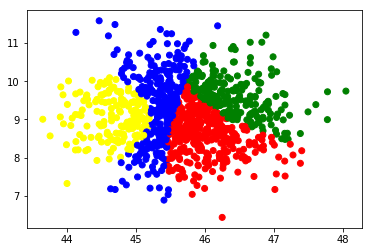

In [7]:
#tf session:
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

for step in range(num_steps):
    _, centroid_values, assignment_values =sess.run([update_centroids,centroids,assignments])

display_partition(lat_values,lon_values,assignment_values)